In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 支持中文
plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']  # 替换为实际的中文字体名称
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

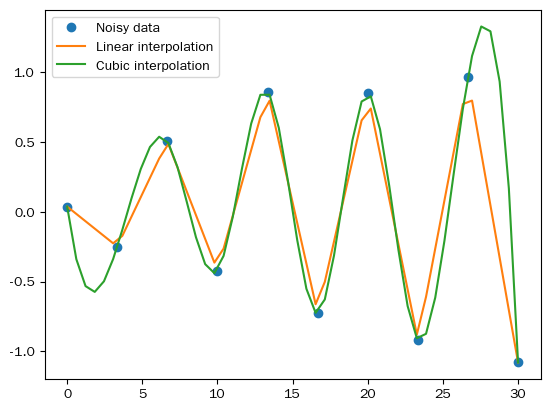

In [2]:
### 1. 给定一组离散数据点，使用 scipy.interpolate 中的插值方法（如线性插值、样条插值等）对其进行插值，并绘制插值结果。


from scipy.interpolate import interp1d

# 给定离散数据点
x = np.linspace(0, 30, 10)
y = np.sin(x)

# 添加噪声
np.random.seed(20240501)
noise = np.random.normal(0, 0.1, len(y))
y_noisy = y + noise

# 以下编码

# 线性插值
linear_interp = interp1d(x, y_noisy, kind='linear')
x_new = np.linspace(0, 30, 50)
y_linear = linear_interp(x_new)

# 样条插值
cubic_interp = interp1d(x, y_noisy, kind='cubic')
y_cubic = cubic_interp(x_new)


# 绘制结果
plt.plot(x, y_noisy, 'o', label='Noisy data')
plt.plot(x_new, y_linear, label='Linear interpolation')
plt.plot(x_new, y_cubic, label='Cubic interpolation')
plt.legend()
plt.show()

# 结果如图所示。   

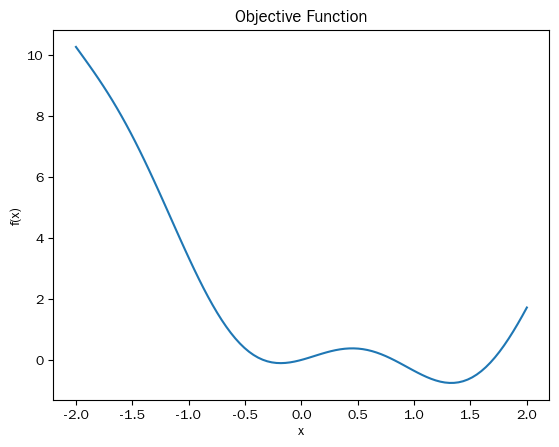

最小值点 x = [1.32933681]
最小值 f(x) = -0.7568804710388237


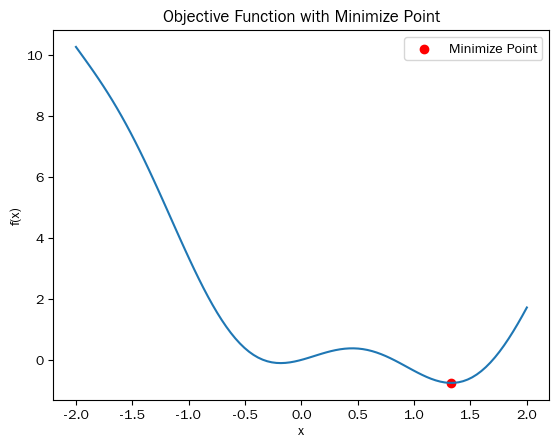

In [5]:
### 2. 使用 scipy.optimize 中的优化算法，找到函数的最小值点，并在图中标出最小值点。

# 目标函数为：

# $$ f(x) = \sin(3x) + 1.5x^2 - 2x $$



from scipy.optimize import basinhopping

# 定义目标函数
def objective_function(x):
    return np.sin(3 * x) + 1.5 * x**2 - 2 * x

# 初步观察函数形状
x = np.linspace(-2, 2, 100)
y = objective_function(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Objective Function')
plt.show()


# 使用Basin Hopping算法找到全局最小值
result = basinhopping(objective_function, x0=0)
# 输出最小值点
print("最小值点 x =", result.x)
print("最小值 f(x) =", result.fun)

# 在图中标出最小值点
plt.plot(x, y)
plt.scatter(result.x, result.fun, c='r', label='Minimize Point')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Objective Function with Minimize Point')
plt.legend()
plt.show()




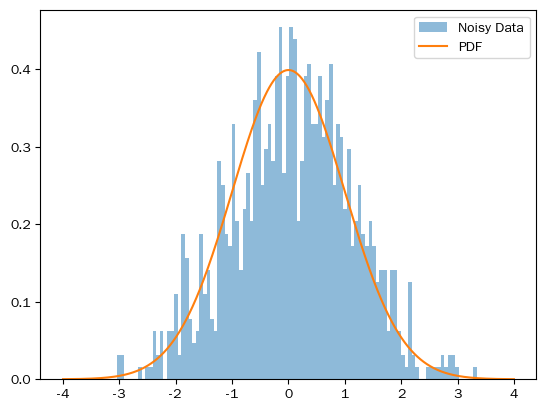

In [6]:
### 3. 绘制正态分布数据的直方图和概率密度函数曲线



from scipy.stats import norm

# 生成正态分布的随机样本
np.random.seed(20240501)
sample_size = 1000
mean = 0
std_dev = 1
data = np.random.normal(mean, std_dev, sample_size)

# 添加噪声
noise_mean = 0
noise_std_dev = 0.2
noise = np.random.normal(noise_mean, noise_std_dev, sample_size)
noisy_data = data + noise

# 以下编码

# 绘制直方图
plt.hist(noisy_data, bins=100, density=True, alpha=0.5, label='Noisy Data')

# 绘制概率密度函数曲线
x = np.linspace(-4, 4, 1000)
pdf = norm.pdf(x, mean, std_dev)
plt.plot(x, pdf, label='PDF')


# 设置图例
plt.legend()

# 显示图形
plt.show()  

# 结果如图所示：     


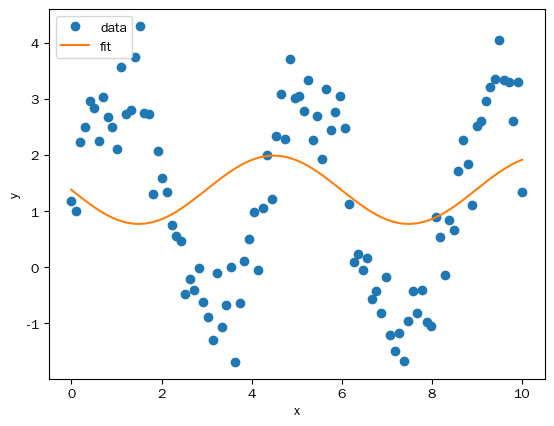

In [7]:

### 4. 对一组实验数据进行曲线拟合，使用 scipy.optimize.curve_fit 函数拟合一个非线性函数，并绘制原始数据和拟合曲线。

from scipy.optimize import curve_fit

# 定义非线性函数
def nonlinear_function(x, a, b, c):
    return a * np.sin(b * x) + c

# 生成实验数据
np.random.seed(20240501)
x_data = np.linspace(0, 10, 100)
y_data = 2 * np.sin(1.5 * x_data) + 1 + np.random.normal(0, 0.5, len(x_data))

# 以下编码
popt, pcov = curve_fit(nonlinear_function, x_data, y_data)


# 绘制原始数据和拟合曲线
plt.plot(x_data, y_data, 'o', label='data')
plt.plot(x_data, nonlinear_function(x_data, *popt), label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()  


数值积分结果: 4.35983562251079e-17


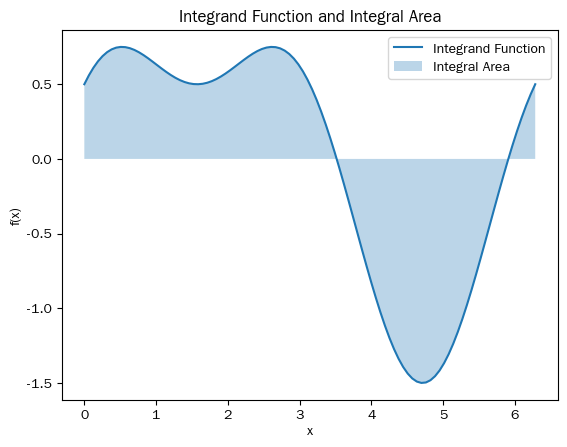

In [8]:
### 5. 对以下函数进行数值积分，并绘制函数曲线以及积分结果的区域。

# 要积分的函数为：

# $$ f(x) = \sin(x) + \frac{1}{2} \cos(2x) $$

# 对该函数从 $x=0$ 到 $x=2\pi$ 进行数值积分。



from scipy.integrate import quad

# 以下编码

# 定义要积分的函数
def integrand(x):
    return np.sin(x) + 0.5 * np.cos(2*x)

# 执行数值积分
result, _ = quad(integrand, 0, 2*np.pi)

# 输出积分结果
print("数值积分结果:", result)

# 绘制函数曲线
x = np.linspace(0, 2*np.pi, 100)
y = integrand(x)
plt.plot(x, y, label='Integrand Function')

# 填充积分结果的区域
x_fill = np.linspace(0, 2*np.pi, 100)
y_fill = integrand(x_fill)
plt.fill_between(x_fill, y_fill, alpha=0.3, label='Integral Area')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Integrand Function and Integral Area')
plt.legend()
plt.show()




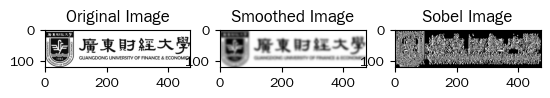

In [6]:
### 6. 使用 scipy.ndimage 中的函数对“gdufe_logo.jpg”进行平滑处理（模糊处理、高斯滤波）和边缘处理（Sobel滤波），并展示原始图片和处理后的效果。

from scipy import ndimage
from PIL import Image

# 读取图像
image = Image.open("assets/gdufe_logo.jpg")
image = image.convert("L")  # 将图像转换为灰度图像

# 平滑处理
smoothed_image = ndimage.gaussian_filter(image, sigma=3)

# 边缘处理
sobel_image = ndimage.sobel(image)

# 展示原始图片和处理后的效果
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')

plt.subplot(133)
plt.imshow(sobel_image, cmap='gray')
plt.title('Sobel Image')

plt.show()



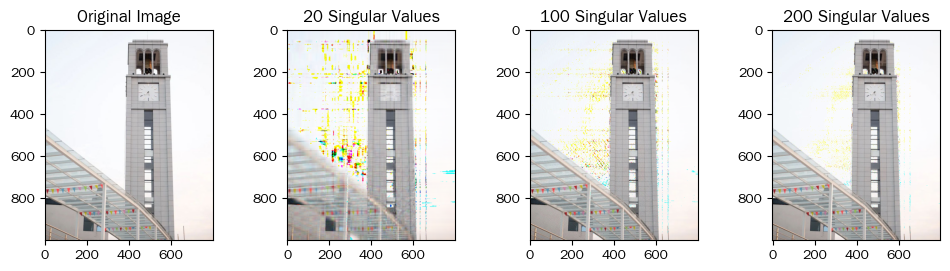

In [9]:
### 7. 对 "gdufe.jpeg" 图像进行奇异值分解，并使用20、100、200个奇异值重建图像，并将原始图像与重建图像进行可视化。

# 注意：用摊平后的图像进行 SVD 操作，然后再重塑展现，从而可以处理彩色RGB图像。



import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 读取彩色图像
image = Image.open("assets/gdufe.jpeg")

# 将图像转换为 NumPy 数组
image_array = np.array(image)

# 对每个颜色通道进行奇异值分解和重建
reconstructed_images = []
num_singular_values = [20, 100, 200]

for k in num_singular_values:
    reconstructed_image = np.zeros(image_array.shape)
    for i in range(3):  # 对RGB通道循环处理
        U, S, V = np.linalg.svd(image_array[:, :, i], full_matrices=False)
        reconstructed_image[:, :, i] = np.dot(U[:, :k], np.dot(np.diag(S[:k]), V[:k, :]))
    reconstructed_images.append(reconstructed_image)

# 可视化原始图像和重建图像
plt.figure(figsize=(12, 6))
plt.subplot(241)
plt.imshow(image)
plt.title('Original Image')

for i, k in enumerate(num_singular_values):
    plt.subplot(2, 4, i+2)
    plt.imshow(reconstructed_images[i].astype(np.uint8))
    plt.title(f'{k} Singular Values')

plt.show()


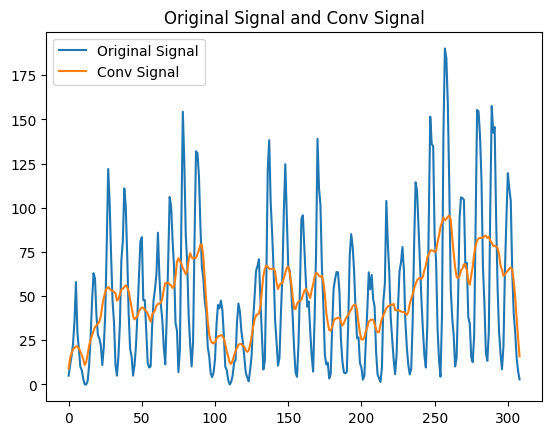

In [7]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from statsmodels import datasets

# 加载太阳黑子数据集
sp = datasets.sunspots.load_pandas().data['SUNACTIVITY']

# 移动平均卷积
kernel = np.ones(10) / 10
conv_sp = signal.convolve(sp, kernel, mode='same')

# 绘制原始信号和卷积后的信号
plt.plot(sp, label='Original Signal')
plt.plot(conv_sp, label='Conv Signal')
plt.title('Original Signal and Conv Signal')
plt.legend()

plt.show()


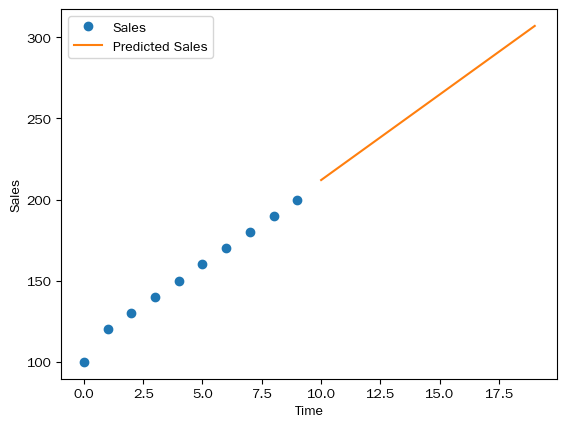

In [15]:
### 9. 给定一段时间的销售额，使用 scipy.stats.linregress 进行线性回归，预测未来的销售额。


from scipy.stats import linregress

# 给定时间段的销售额数据
sales = np.array([100, 120, 130, 140, 150, 160, 170, 180, 190, 200])
time = np.arange(len(sales))

# 以下编码


# 线性回归
slope, intercept, r_value, p_value, std_err = linregress(time, sales)

# 预测未来的销售额
future_time = np.arange(len(sales), len(sales)+10)
future_sales = intercept + slope * future_time


# 绘图
plt.plot(time, sales, 'o', label='Sales')
plt.plot(future_time, future_sales, label='Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

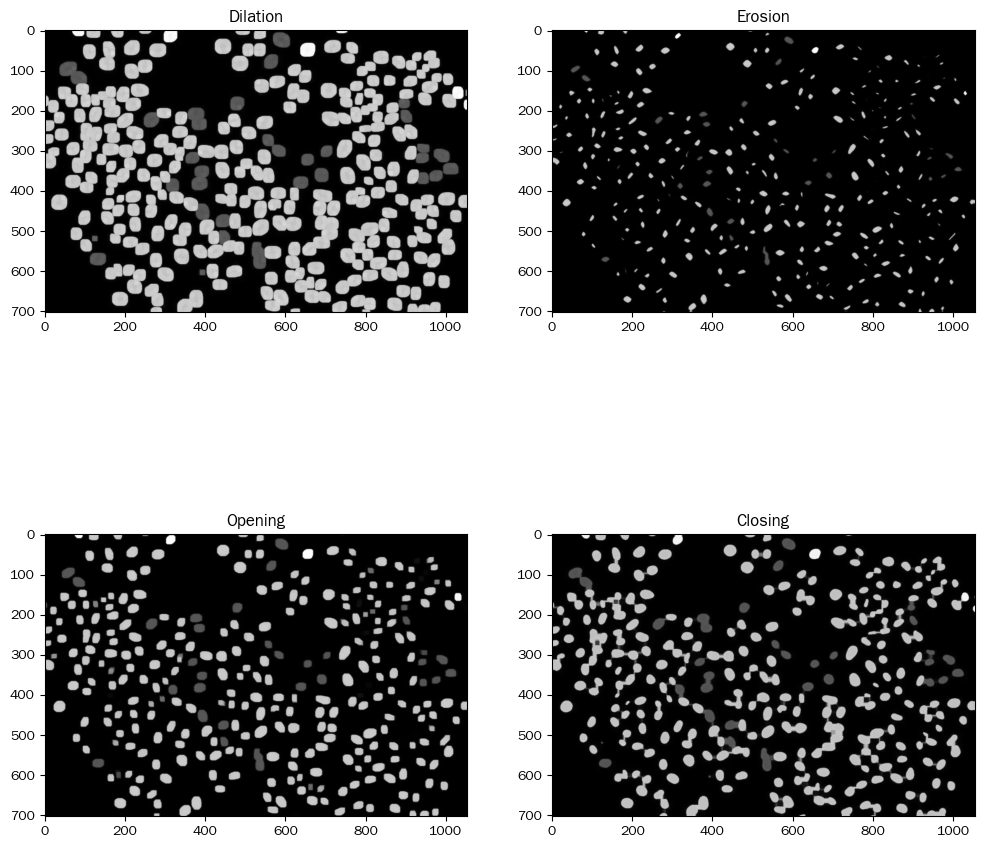

In [17]:
from PIL import Image
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt

# 打开图像
image = Image.open("assets/形态学.jpg")

# 将图像转换为灰度图像
image_gray = image.convert("L")

# 转换为数组
image_array = np.array(image_gray)

# 膨胀
image_dilation = ndimage.grey_dilation(image_array, size=(10, 10))

# 腐蚀
image_erosion = ndimage.grey_erosion(image_array, size=(10, 10))

# 开运算
image_opening = ndimage.grey_opening(image_array, size=(10, 10))

# 闭运算
image_closing = ndimage.grey_closing(image_array, size=(10, 10))

# 可视化处理后的图像
plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.imshow(image_dilation, cmap='gray')
plt.title('Dilation')

plt.subplot(222)
plt.imshow(image_erosion, cmap='gray')
plt.title('Erosion')

plt.subplot(223)
plt.imshow(image_opening, cmap='gray')
plt.title('Opening')

plt.subplot(224)
plt.imshow(image_closing, cmap='gray')
plt.title('Closing')

plt.show()
